## Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import make_pipeline
import os

## Feature Transform (PowerTransform & FunctionTransform)

##### Load Data

In [2]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_data_path = f"{notebook_path}/data/data_pt.csv"

In [3]:
pt_data = pd.read_csv(csv_data_path)
pt_data.head()
x = pt_data['xdata']
x = x.values[:, None]
y = pt_data['ydata']

#### Plot Data

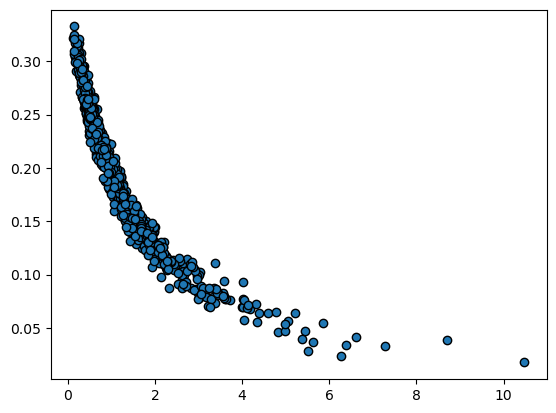

In [4]:
plt.scatter(x, y, ec='k')

#### Function & Power Transform

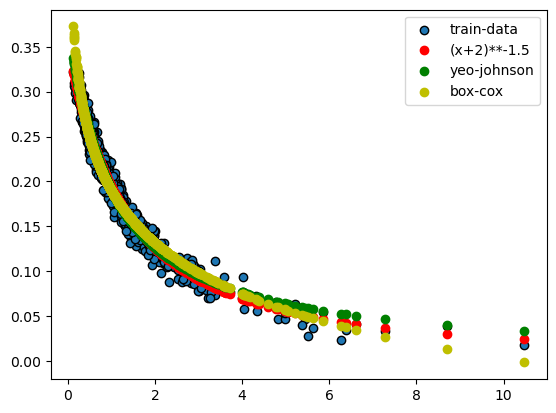

In [5]:
# FunctionTransform with parameters
function_transform = FunctionTransformer(lambda x:(x+2)**-1.5)
x_function_transform = function_transform.fit_transform(x)

model = LinearRegression()
model.fit(x_function_transform, y)
y_hat_func = model.predict(x_function_transform)

# PowerTransformer with yeo-johnson
pt_yeo = PowerTransformer()
x_pt_yeo = pt_yeo.fit_transform(x)

model = LinearRegression()
model.fit(x_pt_yeo, y)
y_hat_yeo = model.predict(x_pt_yeo)

# PowerTransformer with box-cox
pt_box = PowerTransformer('box-cox')
x_pt_box = pt_box.fit_transform(x)

model = LinearRegression()
model.fit(x_pt_box, y)

y_hat_box = model.predict(x_pt_box)


# plots
plt.scatter(x, y, ec='k', label='train-data')
plt.scatter(x, y_hat_func, color='r', label='(x+2)**-1.5')
plt.scatter(x, y_hat_yeo, color='g', label='yeo-johnson')
plt.scatter(x, y_hat_box, color='y', label='box-cox')
plt.legend();

#### Print Lambdas

In [6]:
print(f'lambda for yeo-johnson is {pt_yeo.lambdas_}')
print(f'lambda for box-cox is {pt_box.lambdas_}')

lambda for yeo-johnson is [-0.99860483]
lambda for box-cox is [-0.0325012]


#### Distribution

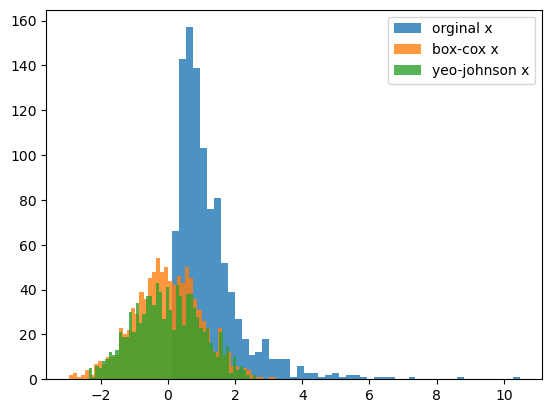

In [7]:
plt.hist(x, bins=50, alpha=0.8, label='orginal x')
plt.hist(x_pt_box, bins=50, alpha=0.8, label='box-cox x')
plt.hist(x_pt_yeo, bins=50, alpha=0.8, label='yeo-johnson x')
plt.legend();